# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_bow_200_512_nolin_dr.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_bow_200_512_nolin_dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.LookupTable
  (2): nn.Mean
  (3): nn.Replicate
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 15.320760396434)
('Valid Perplexity: ', 27.390526104579)
('Test Perplexity: ', 26.200217102922)


### Loss vs. Epoch

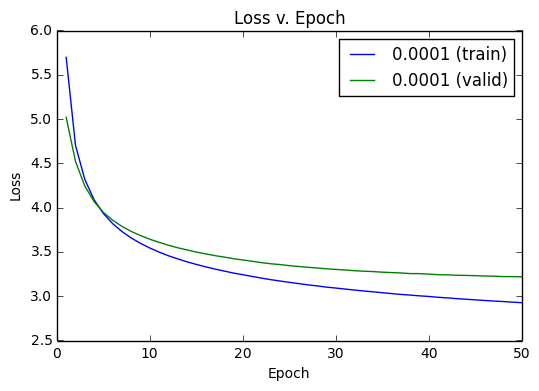

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

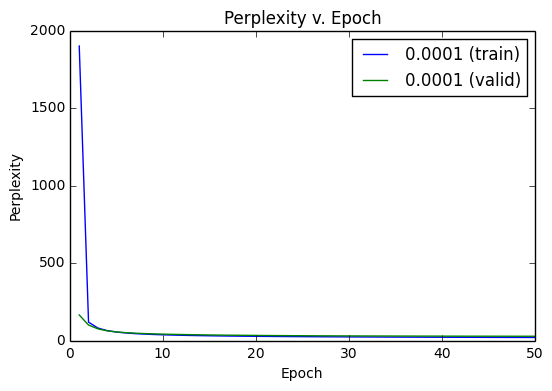

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  chocolate dipped coconut macaroons <begin_ingredients> 3 egg whites <ing> 3 tablespoons caster sugar <ing> 3 cups shredded unsweetened coconut ( i like bob’s red mill ) <ing> 1 1 / 2 teaspoons lemon zest <ing> 5 ounces dark chocolate block ( preferably 72 % dark ) , roughly chopped <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , baking powder , salt , and salt . <step> add the flour , baking powder , baking soda , salt , and salt .

True:  preheat oven to 325 degrees f <step> in a stand mixer with the whisk attachment on high speed , mix egg whites for about 3 minutes until very frothy , slowly add the sugar along the edges of the mixer during the whisking process . after all the sugar has been added , continue to whisk for another 2 minutes ( egg whites will look like marshmallow fluff ) , add the lemon zest . with a wooden spoon or a rubber spatula gently fold in the lemon zest until just combined . add shredded coconut , gently 

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  pacific rim glazed flank steak <begin_ingredients> 1 cup prepared teriyaki marinade <ing> ½ cup chopped onion <ing> ⅓ cup honey <ing> ⅓ cup fresh orange juice <ing> 1 tbsp . dark sesame oil <ing> 1 large clove garlic , crushed and peeled <ing> pepper <ing> 1 2 - lb . beef flank steak <ing> orange slices <ing> rosemary sprigs <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , baking powder , salt , and salt . <step> add the flour , baking powder , baking soda , salt , and salt .

True:  1 . in medium , shallow dish , combine teriyaki marinade , onion , honey , orange juice , oil , garlic , and pepper to taste ; whisk until blended . remove and reserve ¾ cup of marinade for basting . <step> 2 . with sharp knife , lightly score both sides of flank steak in a crisscross pattern . place steak in marinade in dish , turning to coat . cover with plastic wrap and marinate in refrigerator 30 minutes , turning once . <step> 3 . remove steak from

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  chocolate mint rice krispies treats <begin_ingredients> 1 / 4 cup butter <ing> 1 10 oz package of marshmallows <ing> 1 / 2 tsp peppermint extract <ing> 5 1 / 2 cups cocoa krispies <ing> 10 oz white chocolate / almond bark <ing> 1 / 4 cup sugar <ing> green food coloring <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , baking powder , salt , and salt . <step> add the flour , baking powder , baking soda , salt , and salt .

True:  spray a 9 x 13 baking pan with cooking spray . <step> melt butter in a large saucepan over low heat . add marshmallows and mint extract . stir until completely melted . remove from heat . <step> add the cereal into the marshmallow mixture and stir until well coated . <step> use a buttered spatula to evenly press mixture into the 9 x 13 baking pan . <step> while the krispy treats are cooling , mix 3 - 4 drops of food coloring into the sugar . stir well until color is evenly distributed . break up any clumps . 

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  0.02 

1-gram Score:  51.5
2-gram Score:  16.7
3-gram Score:  5.7
4-gram Score:  2.3
